In [156]:
import numpy as np 
import pandas as pd 
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth',400)

# Part 1: Data Cleaning for Sentiment Analysis dataset

In [ ]:
df = pd.read_csv('sentiment_analysis.csv')
df.head(10)

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday https://t.co/antImqAo4Y https://t.co/ejnA78Sks0,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan on becoming #No1TestTeam in the world against all odds! #JI_PakZindabadRallies https://t.co/1o…,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taking you to Maine Mendoza’s surprise thanksgiving party she threw for her fans! https://t.co/oX…",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks a million to our custodial painters this summer. Great job ladies!!!#EC_proud https://t.co/…",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as of July 2017 Feschotte lab will be relocating to @Cornell MBG https://t.co/dd0FG7BRx3,1
5,7.680980e+17,RT @SH4WNSMILE: -Who is excited for illuminate !? -.... https://t.co/AKnIVEGUOe,1
6,7.680980e+17,RT @KendallHuntRPD: The #firstdayofschool for students &amp; teachers. Good luck and have a Successful 2016-17 School Year #EducationMatters ht…,1
7,7.680980e+17,RT @BantySrkian: #SRK and kajol in the making of DDLJ song .. Both are greatest ever 🙏🙏🙏 https://t.co/Aa7fAvvtNE,1
8,7.680980e+17,RT @GayHopper_com: I'm happy! https://t.co/fKXbN3Zhtd,1
9,7.680980e+17,"RT @StarCinema: Kathryn, Daniel share memorable experience in Barcelona SEE INTERVIEW HERE: https://t.co/Vub69JTdKL https://t.co/NntyQWs7To",1


In [ ]:
print('Number of tweets:', df.shape[0])

Number of tweets: 550391


In [ ]:
#remove emoji
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

#Convert to lowercase
df['text'] = df['text'].str.lower()

#Remove URLs
df['text'] = df['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

#remove punctuations
df['text']= df['text'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df.head()

,ID,text,label
0,7.68098e+17,josh jenkins is looking forward to tab breeders crown super sunday,1
1,7.68098e+17,rt mianusmanjaved congratulations pakistan on becoming no1testteam in the world against all odds ji_pakzindabadrallies,1
2,7.68098e+17,rt pepalerts this september yesmag is taking you to maine mendozas surprise thanksgiving party she threw for her fans,1
3,7.68098e+17,rt david_gaibis newly painted walls thanks a million to our custodial painters this summer great job ladiesec_proud,1
4,7.68098e+17,rt cedricfeschotte excited to announce as of july 2017 feschotte lab will be relocating to cornell mbg,1


In [161]:
stop_words = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

In [ ]:
#remove stop words
def remove_stopwords(text):
  
    clean_tokens = [lemmatizer.lemmatize(word) for word in tokenizer.tokenize(text) if word not in stop_words]
    tweet_clean = (' ').join(clean_tokens) # join tokens back to string
    return tweet_clean

In [ ]:
#apply function of removing stopwords
df['text'] = df['text'].apply(str)
df['text'] = df.apply(lambda row: remove_stopwords(row['text']), axis=1)
df.head(10)

,ID,text,label
0,7.68098e+17,josh jenkins looking forward tab breeder crown super sunday,1
1,7.68098e+17,rt mianusmanjaved congratulation pakistan becoming no1testteam world odds ji_pakzindabadrallies,1
2,7.68098e+17,rt pepalerts september yesmag taking maine mendozas surprise thanksgiving party threw fan,1
3,7.68098e+17,rt david_gaibis newly painted wall thanks million custodial painter summer great job ladiesec_proud,1
4,7.68098e+17,rt cedricfeschotte excited announce july 2017 feschotte lab relocating cornell mbg,1
5,7.68098e+17,rt sh4wnsmile excited illuminate,1
6,7.68098e+17,rt kendallhuntrpd firstdayofschool student amp teacher good luck successful 201617 school year educationmatters ht,1
7,7.68098e+17,rt bantysrkian srk kajol making ddlj song greatest ever,1
8,7.68098e+17,rt gayhopper_com im happy,1
9,7.68098e+17,rt starcinema kathryn daniel share memorable experience barcelona see interview,1


## Data cleaning for the second dataset

In [ ]:
neg_df = pd.read_csv('Canadian_elections_2021.csv')
print('Number of tweets:', neg_df.shape[0])

Number of tweets: 1002


In [ ]:
neg_df.head(10)

,text,sentiment,negative_reason
0,"The Canadian election is a power grab by PM Trudeau, yes -- to take it away from the opposition leaders who have chosen obstruction (20 non-confidence motions) and disinformation in the middle of a worldwide pandemic. Yes, no one wanted a vote; the opposition antics forced it.",negative,calling election early
1,"I do hope Trudeau loses the Canadian election tomorrow , called a snap one thinking he’d romp it.. Seems the people there don’t like a Black face hypocrite, super wokist &amp; COVID restriction groupie.. Let’s hope the polls are right, might make our Government think again.",negative,covid
2,"Dear Canadians, This election is a test of how progressive we are. Whether we stand by science, women’s and BIPOC rights, equality, public healthcare &amp; education, the environment. Whether we stand up against hate. We have so much to lose. Don’t let us fall back. #cdnpoli #elxn44",positive,NaN
3,Canadian friends: Never forget that Trudeau had 2 more years on his mandate + called a completely unnecessary election right when vaccine mandates were being rolled out - a moment of extreme political volatility. He gambled the country all so he could be less accountable. #Elxn44,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all my life but in this election I am fighting for my freedoms as a Canadian. I voted last Saturday for @MaxineBernier of the @peoplespca #ppc #VotePPC2021 #VoteForHumanRights #voteforfreedom #maximebernier #PurpleReign #freedom 🇨🇦💜🇨🇦💜🇨🇦,positive,NaN
5,"Vaccines &amp; guns are key this election because O'Toole has no serious plan to get all Canadians vaccinated (he can't even get his candidates vaccinated) &amp; he is playing games on guns so he can deliver for the fun lobby. But many Canadians (and for me), climate is the issue. So...",negative,covid
6,"I’m sorry, moderators can respond but leadership candidates can’t? This debate is a farce and frankly a disservice to Canadians, and after the awful 2019 formats I hope the next election we see new moderation format. They’ve had two goes, that’s enough. #elxn44 #cdnpoli",negative,others
7,"I have to say this. I've been skeptical and critical of mainstream Canadian journalism, but I have never seen this level of trying to choose the winner/influence the outcome of an election as I have with this one. I feel objectivity is a lost art for many in #cdnmedia. #cdnpoli",negative,others
8,If Canadians #VotePPC and support @MaximeBernier that would be a blow to the UN and the Globalists and The Great Reset and Agenda 2030! It could also be a catalyst for freedom that countries around the world (including the US) would respond too! This election is that important!,positive,NaN
9,Justin Trudeau literally had rocks thrown at him yet continued showing &amp; answered questions during an election campaign. Erin O’Toole? Hiding from the media the day before an election because he doesn’t want to answer to the legitimate concerns that Canadians have. #elxn44,positive,NaN


In [ ]:
#remove emoji
neg_df_clean = neg_df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

#Convert to lowercase
neg_df_clean['text'] = neg_df_clean['text'].str.lower()

#Remove URLs
neg_df_clean['text'] = neg_df_clean['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

#remove punctuations
neg_df_clean['text']= neg_df_clean['text'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#remove stopwords
neg_df_clean['text'] = neg_df_clean['text'].apply(str)
neg_df_clean['text'] = neg_df_clean.apply(lambda row: remove_stopwords(row['text']), axis=1)
neg_df_clean.sample(10)

,text,sentiment,negative_reason
337,pat_from_scarb pxlx02 remember really happened otoole got hammered debate know truth say first dont hide ignore rightwing radio dont watch canadian msm amp neither great night,positive,nan
269,canadian justice amp peace middle east election guide 2021 report card party,positive,nan
466,erin otoole spent day preparing use hand like justin trudeau previous debate lol cdnpoli polcan elxn44,positive,nan
993,ffs stop shit lie much otoole ffs shameful journalist mercedesglobal,negative,tell lies
766,bought first bag milk since citizenship make feel canadian voting federal election,positive,nan
290,pattyhajdu thats free country wtg erin otoole,positive,nan
32,true strategic voting advice believe canadian freedom attack want vote count save countrythen recognize fact liberal set win minority election voting conservative change 1 5,positive,nan
171,great leader major political party come together middle election campaign encourage canadian get together thanks thejagmeetsingh getting started,positive,nan
994,rohaniroop callmechris316 cbcalerts vanity election poor guy wasted 600 million dollar lost power killing getting canadian sick leader,negative,others
833,6 year mr trudeau lot debt,negative,economy


# Part 2: Exploratory Data Analysis

Find top k words from all tweets for each dataset to have a glance and pick the useful hashtags

In [132]:
#use the uncleaned data to pull the key words and hashtags
allTweets = neg_df["text"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]

#extract the most frequent hashtags
hashtags = [word for word in tweetWords if word.startswith("#")]
hashtagsCounter = Counter(hashtags)

hashtagsCounter.most_common(50)

[('#elxn44', 115),
 ('#cdnpoli', 85),
 ('#nevervoteconservative', 50),
 ('#voteppc', 46),
 ('#voteliberal', 36),
 ('#istandwithtrudeau', 23),
 ('#otoole', 21),
 ('#ppc', 16),
 ('#elections2021', 15),
 ('#voteliberalmajority', 11),
 ('#canada', 10),
 ('#nevervotecpc', 10),
 ('#forwardforeveryone', 10),
 ('#voteppc2021', 9),
 ('#canadaelection', 9),
 ('#canadianelection', 8),
 ('#ndp', 7),
 ('#liberalmajority', 7),
 ('#votetrudeauout', 7),
 ('#trudeau', 6),
 ('#leadersdebate', 6),
 ('#otooleforpm', 6),
 ('#debatdeschefs', 6),
 ('#conservative', 6),
 ('#maximebernier', 5),
 ('#election2021', 5),
 ('#onpoli', 5),
 ('#polcan', 5),
 ('#purplewave', 5),
 ('#vote', 4),
 ('#canadians', 4),
 ('#justintrudeau', 4),
 ('#cpc', 4),
 ('#flipflopotoole', 4),
 ('#debate2021', 4),
 ('#voteconservative', 4),
 ('#covid19', 4),
 ('#freedom', 3),
 ('#cdnmedia', 3),
 ('#canadian', 3),
 ('#elexn44', 3),
 ('#ndp2021', 3),
 ('#votendp', 3),
 ('#maximebernierforpm', 3),
 ('#makemaxourpm', 3),
 ('#لنصوت_جميعا', 3

Procedures of defining which party the tweet has affiliation with:

1. For the tweet that contains the hashtag that conveys direct message for specific party, count that tweet in the corresonding party.

2. Split data into "Positive" and "Negative" sentiments.

3. Ignore the negative sentiments data since they probably do not give a clear afflilliation of any of the party
4. For the rest positive sentiment tweets, track the most frequent hashtags and keywords being mentioned.

In [ ]:
#organize hashtags have strong willingness to vote for specific parties
cpc = ['#votecpc','#votecpc4canada','#voteconservative','#otoole4pm','#otooleforpm']
lib = ['#voteliberal', '#istandwithtrudeau', '#voteliberalmajority', '#forwardforeveryone', '#liberalmajority', '#teamtrudeau',
       '#liberalsurge', '#liberals', '#voteliberal','#trudeaumajority']
ppc = ['#voteppc', '#voteppc2021', '#voteppcforfreedoms','#jumptoppc','#voteppcforfiscalresponsibility','#maximebernierforpm','#makemaxmypm']
ndp= ['#ndp2021', '#democracy','#teamjagmeet','#votendp', '#readyforbetter'] 

#join the group of hashtags to create a string pattern
cpc_pattern = '|'.join(cpc)
lib_pattern = '|'.join(lib)
ppc_pattern = '|'.join(ppc)
ndp_pattern = '|'.join(ndp)

In [ ]:
#remove emoji
neg_df_lower = neg_df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

#Convert to lowercase
neg_df_lower['text'] = neg_df_lower['text'].str.lower()

#Remove URLs
neg_df_lower['text'] = neg_df_lower['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

#But without removing punctionation beacause it contains hashtag

neg_df_lower.sample(5)

,text,sentiment,negative_reason
994,@rohaniroop @callmechris316 @cbcalerts vanity election... poor guy wasted $600 million dollars and lost some power. killing and getting canadians sick. some leader you have there...,negative,others
448,@wearecanproud the election was called for the glorification of trudeau. why people vote for a leader who doesnt care about canadians,negative,others
822,"y'all, i'm nervous about canada's federal election...",negative,others
292,"singh: i agree, we can't have another 4 years of trudeau trudeau: all the parties talk about this, but we have to rely on our experts. experts say the lpc plan is the best (singh and paul? interrupt)",positive,nan
932,@mjinvesting2021 @justintrudeau trudeau government is weak on criminals using guns then turns around and blames legal gun owners. makes sense.,negative,gun control


In [ ]:
#Count the direct convey message for each party
cpc_count = neg_df_lower[neg_df_lower["text"].str.contains(cpc_pattern).any(level = 0)]
lib_count = neg_df_lower[neg_df_lower["text"].str.contains(lib_pattern).any(level = 0)]
ppc_count = neg_df_lower[neg_df_lower["text"].str.contains(ppc_pattern).any(level = 0)]
ndp_count = neg_df_lower[neg_df_lower["text"].str.contains(ndp_pattern).any(level = 0)]

party_count_step1 = {'Conservative': 11,
                 'Liberal': 74,
                 'PPC': 54,
                 'NDP': 6}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.any(level=1) should use df.groupby(level=1).any()
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.any(level=1) should use df.groupby(level=1).any()
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.any(level=1) should use df.groupby(level=1).any()
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: Futu

In [ ]:
#create a column called 'party' and lable each tweet
cpc_count['party'] = 'Conservative'
lib_count['party'] = 'Liberal'
ppc_count['party'] = 'PPC'
ndp_count['party'] = 'NDP'

In [157]:
#split the dataset into positive and negative sentiments
positive_can_df = neg_df_lower[neg_df_lower['sentiment'] == 'positive']

This step, ignore the rest of negative tweets as they are hard to define the affiliation of parties. 

For all positive sentiments tweets, find the tweet that are not in above direct dataframes that is counted in step 1.

In [ ]:
#concate above 4 dataframes vertically
df_all4 = pd.concat([cpc_count, lib_count, ppc_count, ndp_count], axis=0)

int_df = pd.merge(positive_can_df, df_all4, how ='inner')

result_df = positive_can_df[~positive_can_df.text.isin(int_df.text)]

In [ ]:
#remove punctuations
result_df['text']= result_df['text'].str.replace('[^\w\s]','')
result_df.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,sentiment,negative_reason
2,dear canadians this election is a test of how progressive we are whether we stand by science womens and bipoc rights equality public healthcare amp education the environment whether we stand up against hate we have so much to lose dont let us fall back cdnpoli elxn44,positive,nan
9,justin trudeau literally had rocks thrown at him yet continued showing amp answered questions during an election campaign erin otoole hiding from the media the day before an election because he doesnt want to answer to the legitimate concerns that canadians have elxn44,positive,nan
12,throwbackthursday to federal election debate night in 2019 when i was ready in my tie it just so happens its election2021 debate night tonight im ready to jump in if anyone talks about taxing cookies vote canada cdnpoli,positive,nan


For those 507 tweets, identify their political affiliation based on most frequent key words being mentioned.

In [ ]:
# Keywords of each party
cpc_keywords = ['cpc', 'conservative', 'erin', 'otoole']
lib_keywords = ['liberal', 'justin', 'trudeau']
ppc_keywords = ['ppc', 'maxime', 'bernier']
ndp_keywords = ['ndp', 'singh', 'jagmeet']

In [158]:
party_list = []

party_count_step2 = {'Conservative': 0,
                 'Liberal': 0,
                 'PPC': 0,
                 'NDP': 0}

for tweet in result_df['text']:
  #initiate a empty dictionary
  party_count = dict((par,0) for par in party_count_step2)
  for token in tweet.split(): 
    if token in cpc_keywords:
        party_count['Conservative'] +=1
    elif token in lib_keywords:
        party_count['Liberal'] += 1
    elif token in ppc_keywords:
        party_count['PPC'] += 1
    elif token in ndp_keywords:
        party_count['NDP'] += 1
  #take the max of all mentioned party keywords
  party = max(party_count, key = party_count.get)
  party_list.append(party)
  
  #append the result into a big dictionary
  for p in party_count_step2:
    if p == party:
      party_count_step2[p] += 1

#label the party of tweets into the dataframe
result_df['party'] = party_list

In [ ]:
sentiment_party_df = pd.concat([df_all4, result_df], axis=0)
sentiment_party_df

,text,sentiment,negative_reason,party
81,qq: to those who wish to #voteliberalmajority while waiting in line to vote ask yourself how calling an election now is having the backs of canadians? it isnt. dont ignore this at the ballot box #voteconservative #votendp just dont reward this disregard for canadians #cdnpoli,negative,calling election early,Conservative
167,"i like the carbon tax idea for the conservatives, its ur money and will inspire you to be aware of ur carbon footprint. i love it otoole is calling trudeau out about not even meeting 30%. and keeping ur promises! #otooleforpm #trudeaumustgonow",positive,nan,Conservative
200,"how can you have a leader, representing a #canadian federal party, who is not able to enter #usa or #india. how was it that he was voted in. in the first place?!#votecpc restore honesty and integrity in our election system #canada #cdnpoli #ndpoverhaul",positive,nan,Conservative
273,"@suzannealma @erinotoole is wise and clearly listens to canadians instead of assuming what they are and what they need like @justintrudeau. he also respects us, unlike the @liberal_party. #otoole #otoole4pm #otooleforpm",positive,nan,Conservative
351,"@rosemaryhamulka contrast that negative energy that hes been using to divide this great nation, to that of the positive energy surrounding erin otoole and his team. #votecpc #otooleforpm",positive,nan,Conservative
...,...,...,...,...
904,breaking newsotoole is announcing right now on ctv that he will maintain all the current bans on assault and automatic weapons secondly hes lambasting trudeau for the rise in crime in last 6 years he looks real good,positive,nan,Liberal
938,this election is about canadian freedom without freedom you get enslavement do you want freedom or enslavement it is that simple the rest of the dialectic is just noise to distract you from the real issue freedom,positive,nan,Conservative
940,your progressive conservative government will unfortunately not win your canadian federal election tomorrow unfortunately your current liberal government representing canada will win this 600 million election i would vote conservative you worked hard,positive,nan,Conservative
943,last one of the night lookin like us ndp need to rally behind the libs itll hurt but not as much as the cons running the sunshinecoast elxn44 lets say noblue and fuck otoole deny them every seat possible anythingbutconservative,positive,nan,Conservative


In [159]:
party_count_step2

{'Conservative': 358, 'Liberal': 115, 'NDP': 17, 'PPC': 17}

In [160]:
# concatinate the party count dictionary from step 1
Party_Count_All = dict(Counter(party_count_step1)+Counter(party_count_step2))
Party_Count_All

{'Conservative': 369, 'Liberal': 189, 'NDP': 23, 'PPC': 71}

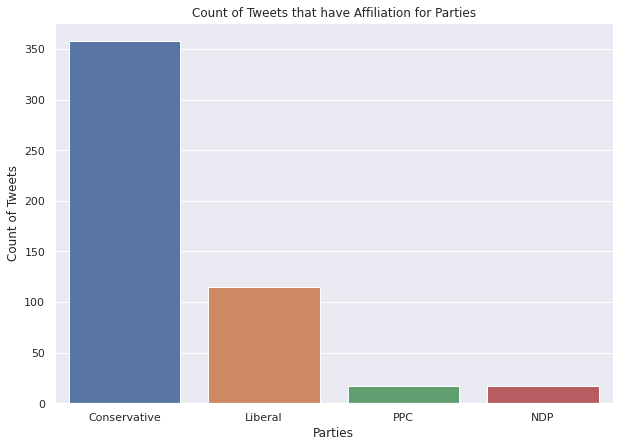

In [ ]:
#plot the distribution among four parties

plt.figure(figsize=(10,7))
sns.set(font_scale=1)
sns.barplot(x=list(party_count_step2.keys()),y=list(party_count_step2.values()))
plt.title('Count of Tweets that have Affiliation for Parties')
plt.xlabel('Parties')
plt.ylabel('Count of Tweets')
plt.show()

The plot result tells us most tweets will vote for Conservative, while PPC and NDP have much fewer supporters compare to Conservative and Liberal.

In [134]:
#define a function to return the most common k words
def get_topk(df, k):
    tweets = df['text'].values
    counter = Counter()
    for tweet in tweets:
        counter.update([lemmatizer.lemmatize(word.lower()) for word in tokenizer.tokenize(tweet) if word not in stop_words and len(word) > 2])
    topk = counter.most_common(k)
    
    return topk

#join list of words into a string for word cloud input
def topk_to_string(wordlist):
  word_hold = []
  for word in wordlist:
    word_hold.append(word[0])
    topk_word_1 = (' ').join(word_hold)

  return topk_word_1

In [139]:
topk_keywords_1 = get_topk(df, k=50)
topk_keywords_1_str = topk_to_string(topk_keywords_1)

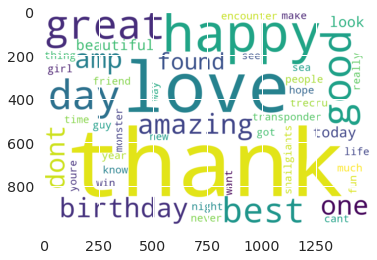

In [162]:
#plot wordcloud for most 50 frequent words
wordcloud_1 = WordCloud(background_color="white",width=1500, height=1000,collocations=False).generate(topk_keywords_1_str)
plt.imshow(wordcloud_1, interpolation='bilinear')

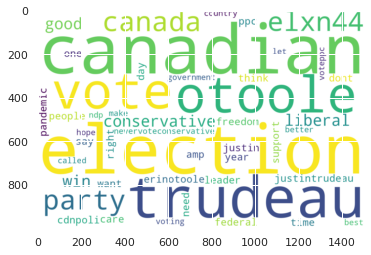

In [147]:
topk_keywords_2 = get_topk(neg_df_clean, k=50)
topk_keywords_2_str = topk_to_string(topk_keywords_2)

#plot wordcloud for most 50 frequent words
wordcloud_2 = WordCloud(background_color="white",width=1500, height=1000,collocations=False).generate(topk_keywords_2_str)
plt.imshow(wordcloud_2, interpolation='bilinear')

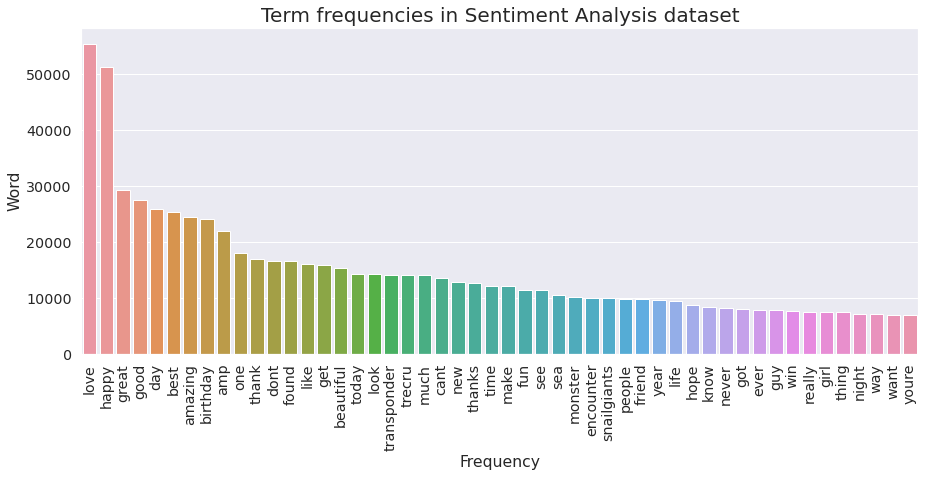

In [155]:
#plot bar chart to show the term frequency of top 50 words
y_1 = [count for word, count in topk_keywords_1]
x_1 = [word for word, count in topk_keywords_1]

plt.figure(figsize=(15,6))
sns.set(font_scale=1.3)
sns.barplot(x=x_1,y=y_1)
plt.title('Term frequencies in Sentiment Analysis dataset', fontsize=20)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.xticks(rotation=90)
plt.show()

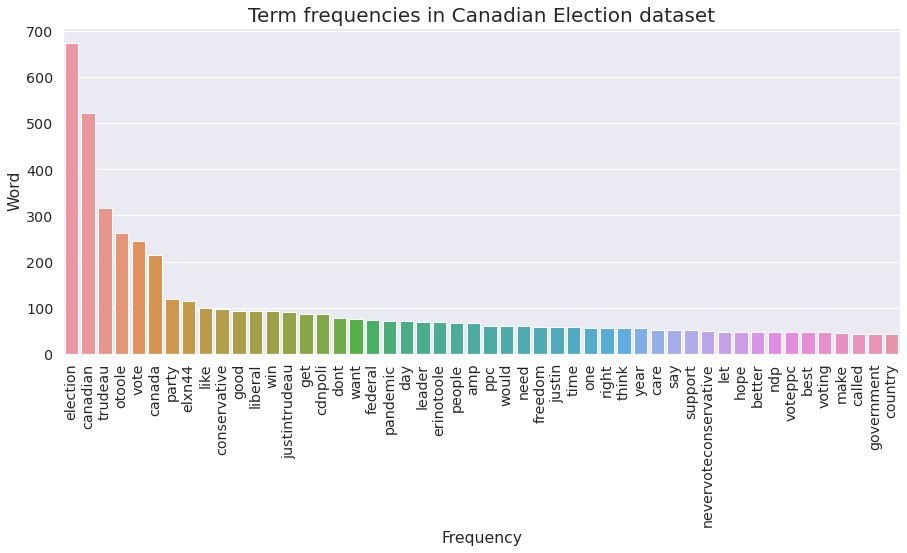

In [154]:
#plot bar chart to show the term frequency of top 50 words
y_2 = [count for word, count in topk_keywords_2]
x_2 = [word for word, count in topk_keywords_2]

plt.figure(figsize=(15,6))
sns.set(font_scale=1.3)
sns.barplot(x=x_2,y=y_2)
plt.title('Term frequencies in Canadian Election dataset',fontsize=20)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.xticks(rotation=90)
plt.show()

# Part 3: Sentiment Classification - Model Development and Tuning

## (a) Seven Models

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

Prepare dataframe using TF-IDF

In [164]:
#Split the generic tweets dataset into 70% training data and 30% testing data
sentiment_X = df['text']
sentiment_Y = df['label']

x_train, x_test, y_train, y_test = train_test_split(sentiment_X, sentiment_Y, test_size = 0.2, random_state=42)
tfidfvectorizer = TfidfVectorizer(analyzer='word', max_features=5000) #only extract top 5000 words

#count_train = countvectorizer.fit_transform(x_train)
tfidf_train = tfidfvectorizer.fit_transform(x_train)
tfidf_test = tfidfvectorizer.transform(x_test)

Model Implementation

In [165]:
def seven_model(x_train, y_train, x_test, y_test, model):
  
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(y_pred.dtype)

    accuracy = accuracy_score(y_test,y_pred)
   
    print('Accuracy Score on testing set is {}'.format(accuracy))
    

In [166]:
#Logistic Regression
lr = LogisticRegression(C=1.0, max_iter = 1000)
seven_model(tfidf_train, y_train, tfidf_test, y_test, model = lr)

object
Accuracy Score on testing set is 0.9681683154825171


In [167]:
#KNN
# the larger leaf_size, the closer neighbors the algorithm picks
knn = KNeighborsClassifier(n_neighbors =5, leaf_size = 400)
seven_model(tfidf_train, y_train, tfidf_test, y_test, model = knn)

object
Accuracy Score on testing set is 0.8098274875316818


In [ ]:
#Naive Bayes
mnb = MultinomialNB() 
#choose multinomialNB because data are typically represented as word vector counts, 
#although tf-idf vectors are also known to work well in practice
seven_model(tfidf_train, y_train, tfidf_test, y_test, model = mnb)

Accuracy Score on testing set is 0.9539862469109273


In [168]:
#SVM
svc = LinearSVC(random_state = 42, penalty = 'l2')
seven_model(tfidf_train, y_train, tfidf_test, y_test, model = svc)

object
Accuracy Score on testing set is 0.9687315473432716


In [ ]:
#Decision Tree
# max_depth was used to reduce model complexity and decrease runtime
dt = DecisionTreeClassifier(random_state = 42, max_depth = 300)
seven_model(tfidf_train, y_train, tfidf_test, y_test, model = dt)

Accuracy Score on testing set is 0.9650263242720533


In [ ]:
#Random Forest
rf = RandomForestClassifier(random_state = 42, n_estimators = 30, max_depth = 300) 
seven_model(tfidf_train, y_train, tfidf_test, y_test, model = rf)

Accuracy Score on testing set is 0.9691629955947136


In [ ]:
#XGBoost
xgb = XGBClassifier(eval_metric = 'auc') #When used with binary classification
seven_model(tfidf_train, y_train, tfidf_test, y_test, model = xgb)

Accuracy Score on testing set is 0.8954281723433974


## (b) Deep Learning Model

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import tensorflow as tf
import numpy as np

In [ ]:
df.shape

(550391, 3)

In [170]:
#convert Y from str to int
df['label'] = df['label'].astype(str).astype(int)

sentiment_X = df['text']
sentiment_Y = df['label']

In [171]:
#split the dataset into train, validation and test set
x_train, x_test, y_train, y_test = train_test_split(sentiment_X, sentiment_Y, test_size = 0.2, random_state=42)

#Perform feature selection on all train and test set
countvectorizer = CountVectorizer(max_features=5000)
x_train_c = countvectorizer.fit_transform(x_train)
x_test = countvectorizer.transform(x_test)

#split the training set into training and validation set
x_train_deep, x_val, y_train_deep, y_val = train_test_split(x_train_c, y_train, test_size=0.25, random_state=1) 

In [174]:
#define a function to convert the sparse array matrix to sparse tensor before passing into Keras
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)

x_train_tensor = convert_sparse_matrix_to_sparse_tensor(x_train_deep)

In [177]:
x_test_tensor = convert_sparse_matrix_to_sparse_tensor(x_test)
x_yal_tensor = convert_sparse_matrix_to_sparse_tensor(x_val)

#convert all Y from series to array before passing into Keras
y_train_np = np.asarray(y_train_deep.copy())
y_test_np = np.asarray(y_test.copy())
y_val_np = np.asarray(y_val.copy())

#reorder X set tensors
x_train_tensor_reorder = tf.sparse.reorder(x_train_tensor)
x_yal_tensor_reorder = tf.sparse.reorder(x_yal_tensor)

In [ ]:
# define the grid search hyper parameter options 
optimizers = ['SGD', 'Adadelta', 'Adam']
epochs = [10,15,20]

for optimizer in optimizers:
  for epoch in epochs:

    # create model
    np.random.seed(9)
    model = Sequential()
    # Hidden Layer (Layer 1)
    model.add(Dense(4, input_shape=(5000,), activation='relu'))
    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.fit(x_train_tensor_reorder, y_train_np, epochs= epoch, verbose=1, batch_size = 64)

    #evaluate the model performance on the validation set to tune the parameters
    loss, prediction_accuracy = model.evaluate(x_yal_tensor_reorder, y_val_np)

    best_accuracy = 0
    #store the best accuracy by comparing each pair of parameter values
    if prediction_accuracy > best_accuracy:
      best_model = model
      #update the model parameters
      best_params = {'Optimizer':optimizer, 'epoch':epoch}
      best_accuracy = prediction_accuracy
 
    print("optimizer=" + str(optimizer))
print (best_params)
print ("Best Score: {}%".format(round(best_accuracy,3)))      

print ("\nThe optimal model uses optimizer ={}, and epoch = {}, and has a predict accuracy score of {}%".
       format(best_params['optimizer'],best_params['epoch'],round(best_accuracy,3)))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_5/dense_10/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_5/dense_10/embedding_lookup_sparse/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_5/dense_10/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


5160/5160 [==============================] - 17s 3ms/step - loss: 0.4513 - accuracy: 0.7789
Epoch 2/10
5160/5160 [==============================] - 11s 2ms/step - loss: 0.2575 - accuracy: 0.9290
Epoch 3/10
5160/5160 [==============================] - 11s 2ms/step - loss: 0.1887 - accuracy: 0.9437
Epoch 4/10
5160/5160 [==============================] - 11s 2ms/step - loss: 0.1570 - accuracy: 0.9508
Epoch 5/10
5160/5160 [==============================] - 11s 2ms/step - loss: 0.1390 - accuracy: 0.9554
Epoch 6/10
5160/5160 [==============================] - 11s 2ms/step - loss: 0.1274 - accuracy: 0.9583
Epoch 7/10
5160/5160 [==============================] - 11s 2ms/step - loss: 0.1192 - accuracy: 0.9606
Epoch 8/10
5160/5160 [==============================] - 12s 2ms/step - loss: 0.1131 - accuracy: 0.9623
Epoch 9/10
5160/5160 [==============================] - 12s 2ms/step - loss: 0.1083 - accuracy: 0.9636
Epoch 10/10
3440/3440 [==============================] - 5s 1ms/step - loss: 0.1057 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_6/dense_12/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_6/dense_12/embedding_lookup_sparse/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_6/dense_12/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


5160/5160 [==============================] - 12s 2ms/step - loss: 0.5318 - accuracy: 0.7238
Epoch 2/15
5160/5160 [==============================] - 12s 2ms/step - loss: 0.2753 - accuracy: 0.9164
Epoch 3/15
5160/5160 [==============================] - 12s 2ms/step - loss: 0.1871 - accuracy: 0.9405
Epoch 4/15
5160/5160 [==============================] - 12s 2ms/step - loss: 0.1533 - accuracy: 0.9494
Epoch 5/15
5160/5160 [==============================] - 12s 2ms/step - loss: 0.1354 - accuracy: 0.9543
Epoch 6/15
5160/5160 [==============================] - 12s 2ms/step - loss: 0.1242 - accuracy: 0.9577
Epoch 7/15
5160/5160 [==============================] - 11s 2ms/step - loss: 0.1164 - accuracy: 0.9601
Epoch 8/15
5160/5160 [==============================] - 11s 2ms/step - loss: 0.1107 - accuracy: 0.9620
Epoch 9/15
5160/5160 [==============================] - 12s 2ms/step - loss: 0.1062 - accuracy: 0.9635
Epoch 10/15
5160/5160 [==============================] - 11s 2ms/step - loss: 0.1027

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_7/dense_14/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_7/dense_14/embedding_lookup_sparse/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_7/dense_14/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


5160/5160 [==============================] - 12s 2ms/step - loss: 0.4497 - accuracy: 0.7906
Epoch 2/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.2373 - accuracy: 0.9281
Epoch 3/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.1737 - accuracy: 0.9438
Epoch 4/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.1464 - accuracy: 0.9511
Epoch 5/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.1312 - accuracy: 0.9558
Epoch 6/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.1213 - accuracy: 0.9588
Epoch 7/20
5160/5160 [==============================] - 11s 2ms/step - loss: 0.1143 - accuracy: 0.9610
Epoch 8/20
5160/5160 [==============================] - 11s 2ms/step - loss: 0.1090 - accuracy: 0.9626
Epoch 9/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.1049 - accuracy: 0.9640
Epoch 10/20
5160/5160 [==============================] - 11s 2ms/step - loss: 0.1016

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_8/dense_16/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_8/dense_16/embedding_lookup_sparse/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_8/dense_16/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


5160/5160 [==============================] - 13s 2ms/step - loss: 0.6947 - accuracy: 0.4864
Epoch 2/10
5160/5160 [==============================] - 13s 2ms/step - loss: 0.6883 - accuracy: 0.6127
Epoch 3/10
5160/5160 [==============================] - 12s 2ms/step - loss: 0.6828 - accuracy: 0.6626
Epoch 4/10
5160/5160 [==============================] - 13s 2ms/step - loss: 0.6774 - accuracy: 0.6741
Epoch 5/10
5160/5160 [==============================] - 12s 2ms/step - loss: 0.6720 - accuracy: 0.6758
Epoch 6/10
5160/5160 [==============================] - 13s 2ms/step - loss: 0.6666 - accuracy: 0.6755
Epoch 7/10
5160/5160 [==============================] - 12s 2ms/step - loss: 0.6610 - accuracy: 0.6753
Epoch 8/10
5160/5160 [==============================] - 13s 2ms/step - loss: 0.6556 - accuracy: 0.6751
Epoch 9/10
5160/5160 [==============================] - 13s 2ms/step - loss: 0.6501 - accuracy: 0.6751
Epoch 10/10
3440/3440 [==============================] - 5s 2ms/step - loss: 0.6420 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_9/dense_18/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_9/dense_18/embedding_lookup_sparse/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_9/dense_18/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


5160/5160 [==============================] - 13s 2ms/step - loss: 0.6919 - accuracy: 0.5363
Epoch 2/15
5160/5160 [==============================] - 13s 2ms/step - loss: 0.6849 - accuracy: 0.6534
Epoch 3/15
5160/5160 [==============================] - 14s 2ms/step - loss: 0.6779 - accuracy: 0.6752
Epoch 4/15
5160/5160 [==============================] - 14s 3ms/step - loss: 0.6706 - accuracy: 0.6761
Epoch 5/15
5160/5160 [==============================] - 14s 3ms/step - loss: 0.6631 - accuracy: 0.6756
Epoch 6/15
5160/5160 [==============================] - 14s 3ms/step - loss: 0.6556 - accuracy: 0.6753
Epoch 7/15
5160/5160 [==============================] - 14s 2ms/step - loss: 0.6482 - accuracy: 0.6751
Epoch 8/15
5160/5160 [==============================] - 14s 3ms/step - loss: 0.6410 - accuracy: 0.6751
Epoch 9/15
5160/5160 [==============================] - 14s 3ms/step - loss: 0.6340 - accuracy: 0.6751
Epoch 10/15
5160/5160 [==============================] - 14s 3ms/step - loss: 0.6271

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_10/dense_20/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_10/dense_20/embedding_lookup_sparse/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_10/dense_20/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


5160/5160 [==============================] - 13s 2ms/step - loss: 0.6870 - accuracy: 0.6079
Epoch 2/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.6775 - accuracy: 0.6593
Epoch 3/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.6668 - accuracy: 0.6759
Epoch 4/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.6553 - accuracy: 0.6778
Epoch 5/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.6437 - accuracy: 0.6770
Epoch 6/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.6325 - accuracy: 0.6763
Epoch 7/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.6220 - accuracy: 0.6759
Epoch 8/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.6119 - accuracy: 0.6757
Epoch 9/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.6024 - accuracy: 0.6756
Epoch 10/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.5934

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_11/dense_22/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_11/dense_22/embedding_lookup_sparse/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_11/dense_22/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


5160/5160 [==============================] - 13s 2ms/step - loss: 0.1421 - accuracy: 0.9518
Epoch 2/10
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0877 - accuracy: 0.9680
Epoch 3/10
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0851 - accuracy: 0.9691
Epoch 4/10
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0834 - accuracy: 0.9697
Epoch 5/10
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0814 - accuracy: 0.9700
Epoch 6/10
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0789 - accuracy: 0.9708
Epoch 7/10
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0767 - accuracy: 0.9715
Epoch 8/10
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0746 - accuracy: 0.9722
Epoch 9/10
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0727 - accuracy: 0.9728
Epoch 10/10
3440/3440 [==============================] - 5s 2ms/step - loss: 0.0884 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_12/dense_24/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_12/dense_24/embedding_lookup_sparse/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_12/dense_24/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


5160/5160 [==============================] - 13s 2ms/step - loss: 0.1454 - accuracy: 0.9548
Epoch 2/15
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0880 - accuracy: 0.9683
Epoch 3/15
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0854 - accuracy: 0.9692
Epoch 4/15
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0843 - accuracy: 0.9695
Epoch 5/15
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0832 - accuracy: 0.9698
Epoch 6/15
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0817 - accuracy: 0.9702
Epoch 7/15
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0801 - accuracy: 0.9706
Epoch 8/15
5160/5160 [==============================] - 15s 3ms/step - loss: 0.0785 - accuracy: 0.9713
Epoch 9/15
5160/5160 [==============================] - 14s 2ms/step - loss: 0.0769 - accuracy: 0.9716
Epoch 10/15
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0755

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_13/dense_26/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_13/dense_26/embedding_lookup_sparse/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_13/dense_26/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


5160/5160 [==============================] - 15s 3ms/step - loss: 0.1471 - accuracy: 0.9481
Epoch 2/20
5160/5160 [==============================] - 14s 2ms/step - loss: 0.0879 - accuracy: 0.9681
Epoch 3/20
5160/5160 [==============================] - 14s 3ms/step - loss: 0.0854 - accuracy: 0.9690
Epoch 4/20
5160/5160 [==============================] - 14s 2ms/step - loss: 0.0841 - accuracy: 0.9694
Epoch 5/20
5160/5160 [==============================] - 14s 3ms/step - loss: 0.0829 - accuracy: 0.9698
Epoch 6/20
5160/5160 [==============================] - 14s 2ms/step - loss: 0.0814 - accuracy: 0.9701
Epoch 7/20
5160/5160 [==============================] - 14s 3ms/step - loss: 0.0794 - accuracy: 0.9708
Epoch 8/20
5160/5160 [==============================] - 14s 3ms/step - loss: 0.0775 - accuracy: 0.9714
Epoch 9/20
5160/5160 [==============================] - 14s 2ms/step - loss: 0.0757 - accuracy: 0.9721
Epoch 10/20
5160/5160 [==============================] - 14s 2ms/step - loss: 0.0741

KeyError: ignored

Implement best model:

In [178]:
# create model with the best parameters
np.random.seed(9)
model = Sequential()
model.add(Dense(4, input_shape=(5000,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(x_train_tensor_reorder, y_train_np, epochs=20, verbose=1, batch_size = 64)

loss, prediction_accuracy = model.evaluate(x_test_tensor, y_test_np)
print("loss = ", loss)
print("prediction accuracy = ", prediction_accuracy)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Reshape:0", shape=(None, 4), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


5160/5160 [==============================] - 13s 2ms/step - loss: 0.1516 - accuracy: 0.9490
Epoch 2/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.0875 - accuracy: 0.9684
Epoch 3/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.0846 - accuracy: 0.9692
Epoch 4/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.0832 - accuracy: 0.9699
Epoch 5/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.0822 - accuracy: 0.9703
Epoch 6/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.0804 - accuracy: 0.9705
Epoch 7/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.0784 - accuracy: 0.9711
Epoch 8/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.0763 - accuracy: 0.9718
Epoch 9/20
5160/5160 [==============================] - 13s 2ms/step - loss: 0.0746 - accuracy: 0.9723
Epoch 10/20
5160/5160 [==============================] - 12s 2ms/step - loss: 0.0729

## (c) Evaluate the model on the Canadian Election data

Encoding the Target Column

In [179]:
from sklearn.preprocessing import OrdinalEncoder

# create the list of unique values of education with the desired order and pass them into the OrdinalEncoder categories
target = ['positive', 'negative']
OE = OrdinalEncoder(categories = [target])
neg_df_clean['sentiment'] = OE.fit_transform(neg_df_clean['sentiment'].values.reshape(-1,1))

In [ ]:
neg_df_clean.head()

,text,sentiment,negative_reason
0,canadian election power grab pm trudeau yes take away opposition leader chosen obstruction 20 nonconfidence motion disinformation middle worldwide pandemic yes one wanted vote opposition antic forced,1.0,calling election early
1,hope trudeau loses canadian election tomorrow called snap one thinking hed romp seems people dont like black face hypocrite super wokist amp covid restriction groupie let hope poll right might make government think,1.0,covid
2,dear canadian election test progressive whether stand science woman bipoc right equality public healthcare amp education environment whether stand hate much lose dont let u fall back cdnpoli elxn44,0.0,nan
3,canadian friend never forget trudeau 2 year mandate called completely unnecessary election right vaccine mandate rolled moment extreme political volatility gambled country could le accountable elxn44,1.0,calling election early
4,sorry thejagmeetsingh voted ndp life election fighting freedom canadian voted last saturday maxinebernier peoplespca ppc voteppc2021 voteforhumanrights voteforfreedom maximebernier purplereign freedom,0.0,nan


In [180]:
Canadian_X = neg_df_clean['text']
Canadian_Y = neg_df_clean['sentiment']

Evaluate the Deep Learning model on the Canadian Dataset

In [182]:
#construct features for second dataset
countvectorizer = CountVectorizer(max_features=5000) #still use 5000 features
x_train_c = countvectorizer.fit(x_train)
x_c = countvectorizer.transform(Canadian_X) #transform the Canadian dataset into 5000 features

x_c_tensor = convert_sparse_matrix_to_sparse_tensor(x_c)
x_c_tensor_reorder = tf.sparse.reorder(x_c_tensor)

y_c = np.asarray(Canadian_Y.copy())

In [183]:
#Evaluate the deep learning model on the Canadian Dataset
loss, prediction_accuracy = model.evaluate(x_c_tensor_reorder, y_c)
print("loss = ", loss)
print("prediction accuracy = ", prediction_accuracy)

32/32 [==============================] - 0s 2ms/step - loss: 6.7463 - accuracy: 0.3214
loss =  6.7462921142578125
prediction accuracy =  0.32135728001594543


Evaluate the SVM model on Canadian dataset

In [187]:
#construct the features for SVM model
tfidfvectorizer = TfidfVectorizer(analyzer='word', max_features=5000) #only extract top 5000 words

tfidf_train = tfidfvectorizer.fit_transform(x_train)
tfidf_Canadian = tfidfvectorizer.transform(Canadian_X)

#Evaluate SVM model on the Canadian Dataset
svc = LinearSVC(random_state = 42, penalty = 'l2')
svc.fit(tfidf_train, y_train)
y_pred = svc.predict(tfidf_Canadian)

In [185]:
accuracy = accuracy_score(Canadian_Y,y_pred)
   
print('Accuracy Score for SVC on Canadian dataset is {}'.format(accuracy))

Accuracy Score for SVC on Canadian dataset is 0.3073852295409182


The model performance on the Canadian dataset is not satisfying. Both deep learning and SVC classifier give the accuracy score around 30%.

## (d) Propose two other evaluation metrics you could use to evaluate the models




1. AUC. Area under curve. It is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
2. F1 Score. It balances out the Precision and Recall metrics across positive/negative lables, especially in an imbalanced dataset, only looking at accuracy score is not enough.

## (e) Sentiment for 4 parties

In [ ]:
sentiment_party_df.sample(5)

,text,sentiment,negative_reason,party
530,"#voteppcforfiscalresponsibility trudeau and otoole will continue to remove your rights, control your life and take away your freedom.",negative,others,PPC
325,ekos polling for the federal election in canada is remarkable if true 50 of canadians aged 1834 would vote for the cpc or ppc both rightwing parties this is higher than the combined total amongst any other age group,positive,nan,Conservative
196,jonathanwnv erinotoole liberal_party hello my name is young hoon song a canadian citizen a canceller of south korean citizenship in 2018 i support justin trudeau i support the liberal good luck for this election to you,positive,nan,Liberal
431,barack obama endorsed canadian prime minister justin trudeau on thursday in the canadian election calling him an effective leader in a rare endorsement of a canadian candidate by a former american president,positive,nan,Liberal
871,@asifintoronto @mustangmadd @erinotoole forgets he begged for an election a few months back. @cpc_hq thinks canadians are stupid; we aren't and we won't vote them in. #nevervoteconservative #voteliberal,negative,others,Liberal


In [ ]:
#Ecode Sentiment Column
from sklearn import preprocessing
lableecoder = preprocessing.LabelEncoder()

Prepare Conservative party datafram for plotting Predictive values and True values

In [ ]:
#fetch the tweets that has affiliation with Conservative party
pt_conservative = sentiment_party_df[sentiment_party_df['party'] == 'Conservative']

con_parties_X = pt_conservative['text']
con_parties_Y = pt_conservative['sentiment']

con_parties_Y = lableecoder.fit_transform(con_parties_Y)

tfidf_con_X = tfidfvectorizer.transform(con_parties_X)

#predict conservative party using SVC model
y_party_pred = svc.predict(tfidf_con_X)

#construct plotting dataframe
con = pd.DataFrame()
con['True Target Value'] = con_parties_Y
con['Prediction Value'] = y_party_pred

true_value = con['True Target Value'].value_counts()
pred_value = con['Prediction Value'].value_counts()
count_value_con = pd.concat([true_value.reset_index(drop = True),pred_value.reset_index(drop = True)],axis=1)
count_value_con.index = ['Positive','Negative']
count_value_con

,True Target Value,Prediction Value
Positive,365,224
Negative,4,145


Prepare liberal party datafram for plotting Predictive values and True values

In [ ]:
pt_lib = sentiment_party_df[sentiment_party_df['party'] == 'Liberal']

lib_parties_X = pt_lib['text']
lib_parties_Y = pt_lib['sentiment']

lib_parties_Y = lableecoder.fit_transform(lib_parties_Y)

tfidf_lib_X = tfidfvectorizer.transform(lib_parties_X)

#predict liberal party using SVC model
y_party_pred_lib = svc.predict(tfidf_lib_X)

#construct plotting dataframe
lib_df = pd.DataFrame()
lib_df['True Target Value'] = lib_parties_Y
lib_df['Prediction Value'] = y_party_pred_lib

true_value_lib = lib_df['True Target Value'].value_counts()
pred_value_lib = lib_df['Prediction Value'].value_counts()
count_value_lib = pd.concat([true_value_lib.reset_index(drop = True),pred_value_lib.reset_index(drop = True)],axis=1)
count_value_lib.index = ['Positive','Negative']

Prepare PPC party datafram for plotting Predictive values and True values

In [ ]:
pt_ppc = sentiment_party_df[sentiment_party_df['party'] == 'PPC']

ppc_parties_X = pt_ppc['text']
ppc_parties_Y = pt_ppc['sentiment']

ppc_parties_Y = lableecoder.fit_transform(ppc_parties_Y)

tfidf_ppc_X = tfidfvectorizer.transform(ppc_parties_X)

#predict ppc party using SVC model
y_party_pred_ppc = svc.predict(tfidf_ppc_X)

#construct plotting dataframe
ppc_df = pd.DataFrame()
ppc_df['True Target Value'] = ppc_parties_Y
ppc_df['Prediction Value'] = y_party_pred_ppc

true_value_ppc = ppc_df['True Target Value'].value_counts()
pred_value_ppc = ppc_df['Prediction Value'].value_counts()
count_value_ppc = pd.concat([true_value_ppc.reset_index(drop = True),pred_value_ppc.reset_index(drop = True)],axis=1)
count_value_ppc.index = ['Positive','Negative']

Prepare NDP party datafram for plotting Predictive values and True values

In [ ]:
pt_ndp = sentiment_party_df[sentiment_party_df['party'] == 'NDP']

ndp_parties_X = pt_ndp['text']
ndp_parties_Y = pt_ndp['sentiment']

ndp_parties_Y = lableecoder.fit_transform(ndp_parties_Y)

tfidf_ndp_X = tfidfvectorizer.transform(ndp_parties_X)

#predict ndp party using SVC model
y_party_pred_ndp = svc.predict(tfidf_ndp_X)

#construct plotting dataframe
ndp_df = pd.DataFrame()
ndp_df['True Target Value'] = ndp_parties_Y
ndp_df['Prediction Value'] = y_party_pred_ndp

true_value_ndp = ndp_df['True Target Value'].value_counts()
pred_value_ndp = ndp_df['Prediction Value'].value_counts()
count_value_ndp = pd.concat([true_value_ndp.reset_index(drop = True),pred_value_ndp.reset_index(drop = True)],axis=1)
count_value_ndp.index = ['Positive','Negative']

<Figure size 720x432 with 0 Axes>

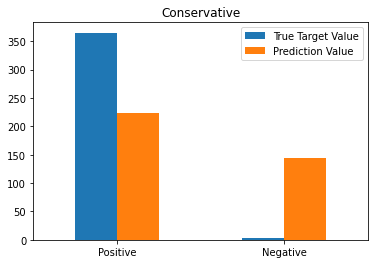

<Figure size 720x432 with 0 Axes>

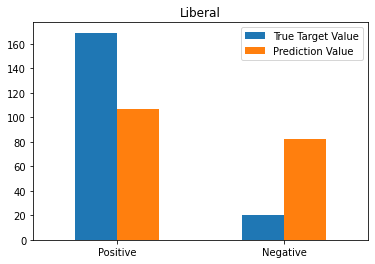

<Figure size 720x432 with 0 Axes>

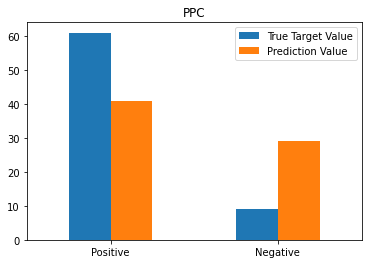

<Figure size 720x432 with 0 Axes>

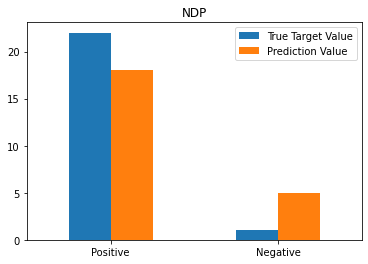

In [ ]:
#Plot 4 bar charts that comparing distribution of predicted values and true values in sentiments
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10,6))
count_value_con.plot(kind = 'bar')
plt.title('Conservative')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(10,6))
count_value_lib.plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title('Liberal')
plt.show()

plt.figure(figsize=(10,6))
count_value_ppc.plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title('PPC')
plt.show()

plt.figure(figsize=(10,6))
count_value_ndp.plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title('NDP')
plt.show()

Findings: 
- The model tend to predict more values in Negative sentiments than ground truths across all four parties. NLP technique definetely help on classifying the positive and negative sentiment tweets during election campaigns but the prediction accuracy need to be improved. 
- For each party, more positive tweets than negative tweets can be observed in the dataset. So that means people tend to support that party when they mention those key words and choose to add the hashtags in their tweets.
- One way to imporve the model: Add negation in the feature and pay extra attention to those words. And take the degree of sentiments of each word into account when building the model because not all the words in positive or negative sentiment have the same level of seveity.

#Part 4: Predict Negative Reason

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, classification_report

In [189]:
#fetch the rows that have negative sentiments
neg_clean = neg_df_clean[neg_df_clean['sentiment'] == 1.0]
neg_clean

,text,sentiment,negative_reason
0,canadian election power grab pm trudeau yes take away opposition leader chosen obstruction 20 nonconfidence motion disinformation middle worldwide pandemic yes one wanted vote opposition antic forced,1.0,calling election early
1,hope trudeau loses canadian election tomorrow called snap one thinking hed romp seems people dont like black face hypocrite super wokist amp covid restriction groupie let hope poll right might make government think,1.0,covid
3,canadian friend never forget trudeau 2 year mandate called completely unnecessary election right vaccine mandate rolled moment extreme political volatility gambled country could le accountable elxn44,1.0,calling election early
5,vaccine amp gun key election otoole serious plan get canadian vaccinated cant even get candidate vaccinated amp playing game gun deliver fun lobby many canadian climate issue,1.0,covid
6,im sorry moderator respond leadership candidate cant debate farce frankly disservice canadian awful 2019 format hope next election see new moderation format theyve two go thats enough elxn44 cdnpoli,1.0,others
...,...,...,...
997,absolutely horrible canada forthcoming election doubt referendum freedom yes covid serious death rate 03 per 100000 police state brutality totally unacceptable unjustifiable,1.0,others
998,davidakin trudeau imposes gun control policy utterly fail address cause nearly 90 gun violence reduces sentence gun crimesand otoole bad guy elxn44 cdnpoli,1.0,gun control
999,canada election stolen thug uneducated goon demanding death covid small business owner pissed government supporting divine right exploited labour force,1.0,others
1000,otoole amends platform gun control question remain change mean cbc news dont fooled otoole reclassify assault weapon theyre street killing others people he liar,1.0,tell lies


In [190]:
neg_X = neg_clean['text']
neg_y = neg_clean['negative_reason'] 

# split to training and testing set
neg_X_train, neg_X_test, neg_y_train, neg_y_test = train_test_split(neg_X, neg_y, test_size = 0.3, random_state = 42) 

In [ ]:
#prepare features using TF-IDF
tfidfvectorizer_4 = TfidfVectorizer(analyzer='word', max_features=5000) 

neg_train = tfidfvectorizer_4.fit_transform(neg_X_train)
neg_test = tfidfvectorizer_4.transform(neg_X_test)

In [ ]:
#perform gridsearch on multinomial Logistic Regression to tune hyperparameters
lr_model = LogisticRegression(random_state = 42, max_iter = 1000, multi_class = 'multinomial', solver = 'saga') 
para_grid = { 
    'C': [0.01, 1, 10, 50],
    'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(lr_model, para_grid, scoring = 'f1_micro', cv = 2) # model tunning
grid_search.fit(neg_train, neg_y_train)

print('Best hyperparameters set found is:')
print(grid_search.best_params_)
y_pred_neg = grid_search.predict(neg_test)
print('F1 score on testing set is {}'.format(f1_score(neg_y_test, y_pred_neg, average = 'micro')))
print()
# generate the classification report for a holistic view
print(classification_report(neg_y_test, y_pred_neg))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Best hyperparameters set found is:
{'C': 10, 'penalty': 'l2'}
F1 score on testing set is 0.4700854700854701

                                     precision    recall  f1-score   support

             calling election early       0.55      0.60      0.57        20
                    climate problem       1.00      0.17      0.29         6
                             covid        0.00      0.00      0.00        10
                            economy       1.00      0.10      0.18        10
                        gun control       0.75      0.75      0.75         4
           healthcare and marijuana       0.00      0.00      0.00         3
                             others       0.45      0.88      0.60        42
                            scandal       0.00      0.00      0.00         3
                          tell lies       0.14      0.06      0.08        17
women reproductive right and racism       0.00      0.00      0.00         2

                           accuracy       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the report, we can see that the negative reason category of 'women reproductive right and racism', 'healthcare and marijuana', 'Scandal", "covid" have 0 precision and recall. 

Let's print those tweets for a further look.

In [ ]:
women = neg_df_clean[neg_df_clean['negative_reason'] == 'women reproductive right and racism']
women

,text,sentiment,negative_reason
247,hell using man voice translate justin trudeau sound like white man slap face strong black woman like justin trudeau,1.0,women reproductive right and racism
263,flexdacat please send picture otoole dressed racist blackface please like hero lmfao,1.0,women reproductive right and racism
907,suzannealma inky_mark erinotoole otoole display contempt canadian blackfaced former pm racist policy voteppc end apartheid,1.0,women reproductive right and racism
996,hey cbcnews get white ass cover story canadian racism hate crime colored people wtf cbcnews important election fascist murder seems like happen,1.0,women reproductive right and racism


In [193]:
scandal = neg_df_clean[neg_df_clean['negative_reason'] == 'scandal']
scandal

,text,sentiment,negative_reason
10,every time close eye brain start thinking otoole kenney apparently sort arrangement aid cpcs election prospect actually cost canadian life devastating sense well everything,1.0,scandal
16,misspoke earlier scandal ethic commissioner cleared pmjt wrongdoing way otoole amp singh targeted woman mental illness amp speaks topic help others order score political point say enough character,1.0,scandal
45,arbiewise canadiansence erinotoole cpc_hq yes100his election call gaining seat bury truth many scandal using covid political tool achieve personal goalnot goal benefit canadian,1.0,scandal
113,conservative accusing liberal leader justin trudeau calling election cover detail happened canada level 4 laboratory canadian government scientist reportedly collaborated highranking chinese military officer,1.0,scandal
382,canadian really got caught russiatrump election meddling look kind meddling ok american always meddle election ok cuz obama cool elxn44,1.0,scandal
573,u politician endorsing canadian party leader upcoming election seems new miss past election seems weird vote mp party leader usstyle,1.0,scandal
625,history 18september year2019 election interest photo canadian pm justin trudeau wearing brownface 2001 emerges canadian election campiagn,1.0,scandal
750,good lord would lucky enough two bunch selfish ppl may take election canadian multicultural honest believe constitution sad see canada digging dirt like u,1.0,scandal
808,trudeau since 2019 fire candidate sexual assault woman nothing hoping canadian would never find ill election avoids answer like always say respect woman,1.0,scandal
825,trudeau tarnished longer anew worn longer welcome,1.0,scandal


In [ ]:
healthcare = neg_df_clean[neg_df_clean['negative_reason'] == 'healthcare and marijuana']
healthcare 


,text,sentiment,negative_reason
56,going monday election know conservative win province totally left manage pandemic kennedy amp ford ontario disapprove cerb regardless win countless abled canadian today disabled tomorrow 9,1.0,healthcare and marijuana
93,redmcgraw1 kamorant lumeena koanside actually people still paying full price child care still promise wont fully realized 202526 mean election 45 liberal screaming u vote ndp lose child care already getting old u,1.0,healthcare and marijuana
282,3 trudeaus response good noted mr otoole didnt seem know canada health care act work federal govt responsible ensuring act followed province summary quoting elxn44 leader debate,1.0,healthcare and marijuana
315,jodim2019 truth like trudeau promising clean drinking water yet first nation,1.0,healthcare and marijuana
316,canada debate indigenous community clean drinking water singh trudeau spent billion help bank didnt give clean drinking water truth,1.0,healthcare and marijuana
430,chantalhbert erinotoole think canadian looking childcare aa main election point better get bubble,1.0,healthcare and marijuana
923,justintrudeau minute threatened canadian withholding healthcare vaccinated minute lost election shame youwe leave one behind,1.0,healthcare and marijuana


(a) I use Multinomial Logistic Regression model to predict the negative reason is the. The performance on the test set is not very good with F1 score of 47%.  Some reasons of the model failed to predict the correct negative reason class could be that 
1. There are too many features. 
2. Not large enough training set. Especially for the class of 'women reproductive right and racism', 'healthcare and marijuana', result in 0% precision and recall on those classes. 
3. Some classes contain mix of word information in terms of features making the model hard to catch the pattern and predict the result.

(b) Therefore, I suggest collecting more data for analyzing negative reasons in all classes, and do the feature selection that represent each class the best to train the model.